In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import roc_curve

In [53]:
# load load_breast_cancer
data = load_breast_cancer()
ix = np.where(data["feature_names"] == "mean area")[0][0]
iy = np.where(data["feature_names"] == "mean concave points")[0][0]

data_x = np.asarray([data["data"][:,ix], data["data"][:,iy] ]).T

data_y = (1.*(data["target"]==np.where(data["target_names"] == "malignant")[0][0]) +
     -1.*(data["target"]==np.where(data["target_names"] == "benign")[0][0]))


In [54]:
# normalize (use StandardScaler if you wish)
#print(data_x)
norm = StandardScaler()
norm_x=norm.fit_transform(data_x)


In [55]:
# partition with test size 0.3
#print(norm_x)
train_x, test_x, train_y, test_y = train_test_split( norm_x, data_y, test_size=0.3, random_state=42)

In [56]:
# fit logistic regression and 
# use predict_log_proba()

model = LogisticRegression(C=1e5, solver='lbfgs')
model.fit(train_x, train_y)

#pred_y = model.predict(test_x)
pred_y = model.predict_log_proba(test_x)



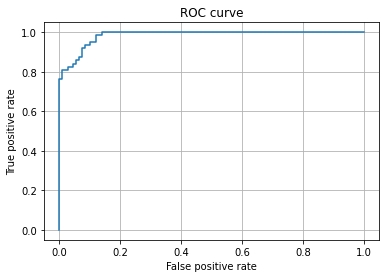

In [57]:
# draw ROC curve

fpr, tpr, _ = roc_curve(test_y, pred_y[:,1])
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [58]:
# What happens to the "score" when C = 1, 1/10, 150, 100, 1000?

c1 = LogisticRegression(C=1, solver='lbfgs').fit(train_x, train_y).score(test_x,test_y)
c110 = LogisticRegression(C=0.1, solver='lbfgs').fit(train_x, train_y).score(test_x,test_y)
c150 = LogisticRegression(C=150, solver='lbfgs').fit(train_x, train_y).score(test_x,test_y)
c100 = LogisticRegression(C=100, solver='lbfgs').fit(train_x, train_y).score(test_x,test_y)
c1000 = LogisticRegression(C=1000, solver='lbfgs').fit(train_x, train_y).score(test_x,test_y)

print()

0.9064327485380117
0.9239766081871345
0.9064327485380117
0.9064327485380117
0.9064327485380117
